# 7장 텍스트 문서의 범주화
- 전이학습을 텍스트 문서 분류에 적용하는 방법
- 각 문서를 그 내용에 기초해 하나 이상의 범주 내지 클래스에 할당하는 것.

## 텍스트 범주화
- 소프트 할당(soft assignment) 또는 하드 할당(hard assignment)
- 스팸 필터링, 감성 분류, 문제 티켓 할당, 문제 티켓의 자동 해결, 타깃 마케팅, 장르 분류, 청구서 사기 탐지 등에 사용


### 전통적인 텍스트 범주화
- 전처리 단계: 문장 나누기, 토근화, 어간 추출과 원형 복원, 텍스트 정리
- 텍스트를 벡터로 표현(단어 주머니[Bag of words, BoW])
- 단어 빈도와 역문서 빈도(TF-IDF) = 단어 빈도 * 역문서 빈도
- 텍스트 분류 알고리즘
    - 다항 나이브 베이즈 분류
    - **서포트 벡터 머신**(**SVM**, 훨씬 더 높은 정확도)
    - k-최근접 이웃 알고리즘

### BoW 모델의 단점
- 카운트 기반 BoW모델은 각 텍스트 문서에서 의미, 구조, 순서 및 근접 단어 주변의 맥락 같은 추가 정보를 잃게 함.
- 비슷한 의미의 단어도 다르게 취급
- 잠재 의미 색인(Latent Semantic indexing, LSI) : 유사한 의미를 가진 단어가 가까운 데터로 표현.

## 단어 표현
- 텍스트 데이터를 처리해 의미 있는 특성이나 단어 임베딩을 추출하는 고급 전략
- Word2vec 모델 : 계신 및 고품질 생성 가능, 분산과 단어의 연속 밀집 벡터 표현으로 문맥과 의미의 유사성을 포착해 예측함.
    - 연속적 단어 주머니(CBOW)모델 : 소스-문맥 단어(주변 단어)를 기반으로 현재 타겟 단어(중심 단어) 예측
    - 스킵 그램(Skip-gram) 모델 : CBOW모델이 하는 방법을 반대로 시도. 즉 타깃 단어(중심 단어)가 주어지면 원본 문맥 단어(주변 단어) 예측.

- 두 모델의 아키텍처 다이어그램

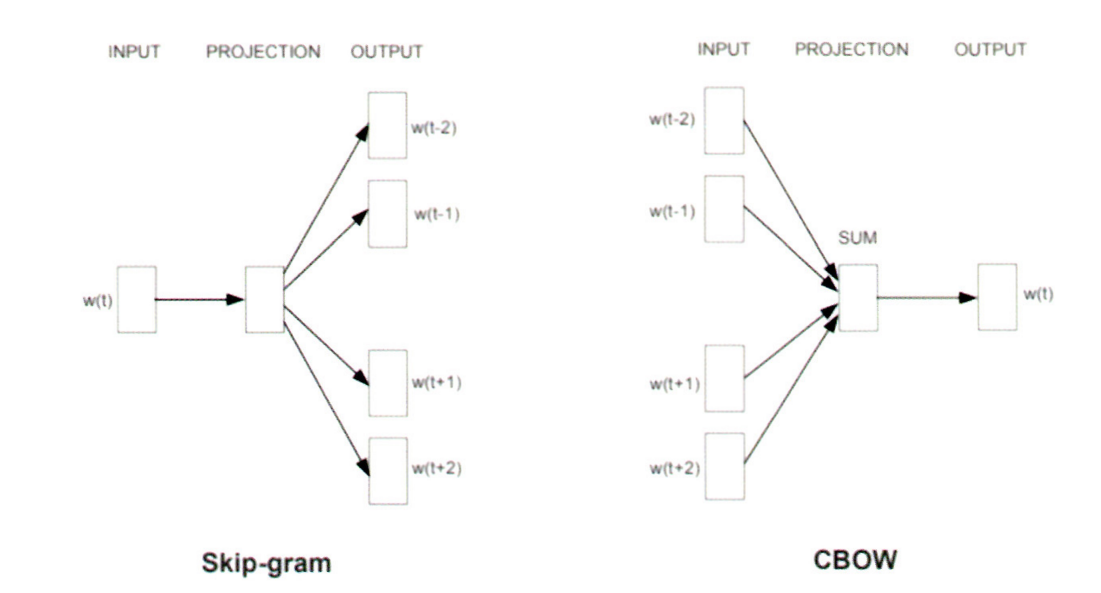

### GloVe 모델
- Glove란 '글로벌 벡터(Global Vectors)라는 의미
- 밀집 단어 벡터를 얻기 위해 사용함.
- 단어-문맥(WC) 쌍으로 구성된 거대한 단어-문맥 동시 발생 행렬 구축
- 단어-특성(WF)행렬 및 특성-문맥(FC)행렬의 곱으로 WC를 나타내기 위해 행렬 인수분해(Matrix factorization)사용.
- WC = WF x FC. WF와 FC는 임의의 가치로 초기화하며, WC의 근사치를 통해 측정한다.
- 확률적 경사 하강(SGD) 수행


## CNN문서 모델
- 문서의 계층적 분산 표현을 구현한 합성곱망(ConvNet)의 문서 모델 
- 문장 수준에서 합성곱망은 각 문장의 단어 임베딩으로부터 전체 문장의 임베딩을 구한다.
- 합성공망 아키텍서에는 합성곱층 다음에 하위 샘플링/풀링 층이 있다.(k-max 풀링)
- k-max 풀링 연산은 뉴런의 슬라이딩 윈도에서 최대를 취하는 일반적인 max 풀링과 약간 다르다.
- k-max 풀링은 다양한 크기의 입력에 적용될 수 있으며, 그때도 여전히 같은 수의 출력 유닛을 얻을 수 있다.

- 합성공 신경망(Convolutional Neural Network, CNN)의 아키텍처

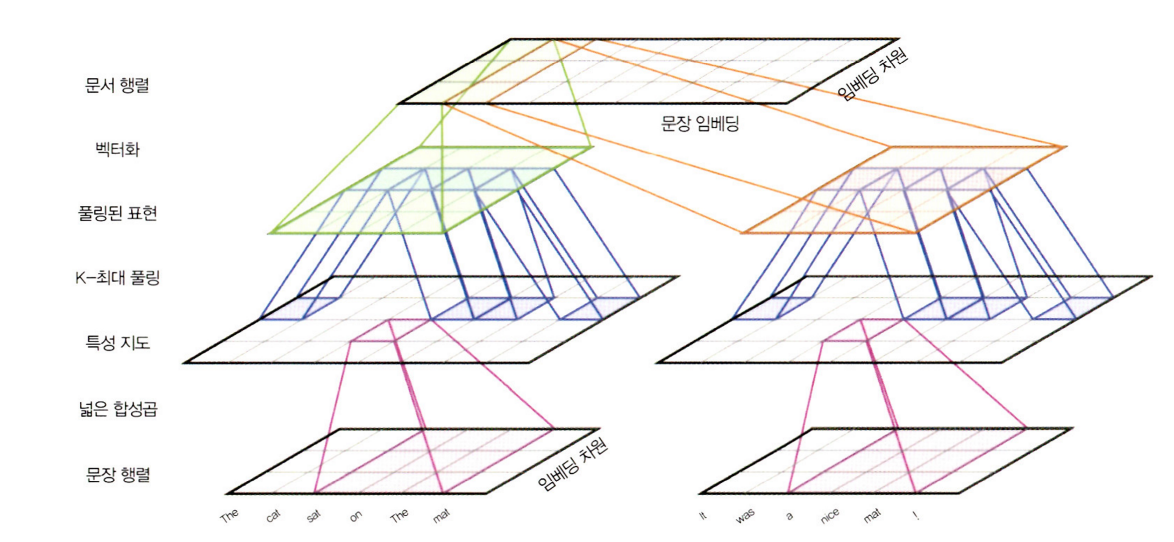

### CNN 모델로 문서 요약하기
- 텍스트 요약을 위한 첫 단게 => 돌출맵(saliency map) 만들기
    - 1. 문서에 대한 클래스 예측 생성
    - 2. 의사 레이블(pseudo label) 만들기
    - 3. 의사 레이블을 실제 레이블처럼 손실 함수에 제공한다.
    - 4. 문장 임베딩층에 손실 함수의 미분을 계산한다.
    - 5. 가장 중요한 문장이 위에 가도록 내림차순 기울기 노름으로 문장을 정렬

## 정리
- 이 장에서 배운 개념: 자연 언어 처리, 텍스트 분류, 텍스트 요약, 텍스트 도메인에서의 딥러닝 CNN 모델 적용에 대한 개념
- 대부분 유스케이스의 첫 단계는 단어 임베딩(특히 훈련 데이터가 적을수록 그렇다.)
- 학습된 CNN 모델을 다른 텍스트 처리 작업에 사용하는 과제(밀집 벡터로 문서를 요약하고 표현하는 것으로 정보 검색 시스템에서 검색 기능 향상시키는 데 사용하는 방법) 배움.